In [3]:
#Single layer NN with ReLU activation to construct simple linear model

import numpy as np
import matplotlib.pyplot as plt

In [10]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [5.5], [6.1], [5.0], [5.5], [10.929], [7.0],
                    [8.0], [9.0], [10.0]], dtype=np.float32) #features
y_train = np.array([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0],
                    [7.0], [8.0], [9.0], [10.0], [11.0], [12.0],
                    [13.0], [14.0], [15.0]], dtype=np.float32) #labels

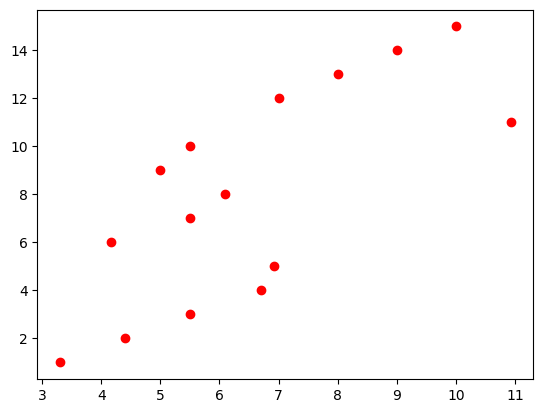

In [5]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')
plt.show()

In [6]:
import torch

In [11]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for x_train:', X_train.requires_grad)
print('requires_grad for y_train:', Y_train.requires_grad)

requires_grad for x_train: False
requires_grad for y_train: False


In [13]:
input_size = 1
hidden_size = 100
output_size = 1
learning_rate = 1e-6

In [14]:
w1 = torch.rand(input_size,hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 100])

In [18]:
w2 = torch.rand(input_size, hidden_size, requires_grad=True)
w2.shape

torch.Size([1, 100])

In [20]:
for iter in range(1,301):

    y_pred = X_train.mm(w1).clamp(min=0).mm(w2.t())
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 == 0:
        print(iter, loss.item())
    
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()



50 1032.7662353515625
100 133.50735473632812
150 128.2818603515625
200 128.25035095214844
250 128.2501678466797
300 128.25013732910156


In [21]:
print('Final weights:')
print('w1:', w1)
print('w2:', w2)

Final weights:
w1: tensor([[ 5.8943e-01,  8.2685e-01,  2.2071e-01, -2.6210e-04,  5.2924e-01,
          5.6566e-01, -7.0575e-03, -3.5094e-03, -4.6079e-03, -1.1563e-04,
          5.2889e-01, -4.8849e-03,  1.0966e-01,  6.6920e-01, -6.5534e-03,
          8.1287e-01,  5.6924e-01,  8.3746e-01,  6.7678e-01,  3.7149e-01,
          5.3511e-01,  7.3158e-01,  1.5069e-01,  3.8738e-01,  2.3108e-01,
          3.6377e-01, -9.9217e-05,  9.1803e-01,  7.8958e-01, -4.8720e-03,
          9.1525e-01,  1.5840e-01, -2.7628e-03,  7.3876e-01,  5.5384e-01,
         -1.6891e-02, -3.4103e-03,  2.4887e-01,  3.1089e-01,  7.0322e-01,
         -8.4236e-04,  5.8245e-01,  4.4697e-01,  4.5843e-02,  3.1942e-01,
          4.0814e-01, -1.0205e-02, -7.3606e-03,  4.7425e-01,  2.5945e-01,
          1.8636e-01,  4.0965e-01,  2.5695e-02,  3.8861e-01,  3.0821e-01,
          9.6408e-02,  8.0110e-01,  6.6427e-01, -1.2668e-02,  4.2575e-01,
          5.4370e-01,  1.2831e-01,  2.7429e-01,  2.2670e-01,  1.9465e-02,
          4.9444e-0

In [22]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 5.5000],
        [ 6.1000],
        [ 5.0000],
        [ 5.5000],
        [10.9290],
        [ 7.0000],
        [ 8.0000],
        [ 9.0000],
        [10.0000]])

In [25]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2.t())
predicted_in_tensor

tensor([[ 4.1380],
        [ 5.5173],
        [ 6.8966],
        [ 8.4139],
        [ 8.6897],
        [ 5.2264],
        [ 6.8966],
        [ 7.6490],
        [ 6.2696],
        [ 6.8966],
        [13.7042],
        [ 8.7775],
        [10.0314],
        [11.2854],
        [12.5393]], grad_fn=<MmBackward0>)

In [26]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[ 4.137968 ],
       [ 5.5172906],
       [ 6.896613 ],
       [ 8.413869 ],
       [ 8.689732 ],
       [ 5.2263794],
       [ 6.896613 ],
       [ 7.6489716],
       [ 6.2696486],
       [ 6.896613 ],
       [13.704196 ],
       [ 8.777508 ],
       [10.031438 ],
       [11.285366 ],
       [12.539297 ]], dtype=float32)

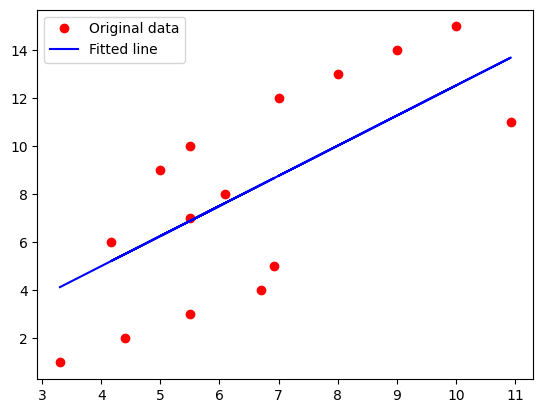

In [27]:
plt.plot(x_train, y_train, 'ro', label = 'Original data')
plt.plot(x_train, predicted, 'b-', label = 'Fitted line')
plt.legend()
plt.show()